# Binomial Distribution- Theory


**Binomial distribution** is a probability distribution that summarises the likelihood that a variable will take one of two independent values under a given set of parameters. The distribution is obtained by performing a number of **Bernoulli** trials.

A Bernoulli trial is assumed to meet each of these criteria :

- There must be only 2 possible outcomes.
- Each outcome has a fixed probability of occurring. A success has the probability of p, and a failure has the probability of 1 – p.
- Each trial is completely independent of all others.

The binomial random variable represents the number of successes(r) in n successive independent trials of a Bernoulli experiment.

Probability of achieving r success and n-r failure is :

$$p^r * (1-p)^{n-r}$$

The number of ways we can achieve r successes is : 

$$\frac{n!}{(n-r)!\ *\ r!}$$

Hence, the probability mass function(pmf), which is the total probability of achieving r success and n-r failure is :

$$\frac{n!}{(n-r)!\ *\ r!}\ *\ p^r * (1-p)^{n-r}$$

An example illustrating the distribution :
Consider a random experiment of tossing a biased coin 6 times where the probability of getting a head is 0.6. If ‘getting a head’ is considered as ‘success’ then, the binomial distribution table will contain the probability of r successes for each possible value of r.




# Binomial Distribution in model ensemble validation

The ensemble in entirety, makes an error in case (M+1)/2 or more models make an error $\epsilon$ simultaneously. Here, M is number of independent models and is assumed to be an odd number. The probability that exactly k independet models make an error is:

$${P(exactly\ k\ hypotheses\ make\ an\ error)} = \binom{M}{k}\ \varepsilon^k{(1-\varepsilon)}^{(M-k)}$$

and 

$$P(error) = \sum_{k=(M+1)/2}^{M}{P(exactly\ k\ hypotheses\ make\ an\ error)} = \sum_{k=(M+1)/2}^{M}{\binom{M}{k}\ \varepsilon^k{(1-\varepsilon)}^{(M-k)}}$$

, where

$$\binom{M}{k}\ = \frac{M!}{k!(M-k)!}$$





In [154]:
import math

In [170]:
# This function computes the probability that (M+1)/2 or more models make an error 'e'.
def ComputeErrorProbability(M,e):

    # k is the minimum number of models making error 'e'.
    k = int((M+1)/2)
    prob = 0
    # total probability is the sum of probabilities for values of k, K+1,..M
    # M+1 because the range function is inclusive on lower bound of k, and exclusive on upper bound M+1 
    for i in range(k,M+1):
        prob += (math.factorial(M)/(math.factorial(i)* math.factorial(M-i)))*pow(e,i)*(pow((1-e),M-i))
        
    
    return prob


1. The ensemble contains 11 independent models, all of which have an error rate of 0.2.



In [171]:
print(ComputeErrorProbability(11,.2))

0.011654205440000008


2. The ensemble contains 11 independent models, all of which have an error rate of 0.49.


In [172]:
print(ComputeErrorProbability(11,.49))

0.47294772571497457


In [ ]:
3. The ensemble contains 21 independent models, all of which have an error rate of 0.49.

In [173]:
print(ComputeErrorProbability(21,.49))

0.46304790101273546


In [168]:
print(ComputeErrorProbability(11,.4))

0.24650186752000006


In [163]:
for i in range(6,12):
    print(i)

6
7
8
9
10
11


https://machinelearningmastery.com/voting-ensembles-with-python/#:~:text=A%20voting%20ensemble%20(or%20a,model%20used%20in%20the%20ensemble.

In [147]:
from scipy.stats import binom 
# setting the values 
# of n and p 
n = 11 # Number of trials
p = 0.8 # Probability of success

# defining the list of r values 
r_values = list(range(n+1)) 

print(r_values)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [141]:

# obtaining the mean and variance  
mean, var = binom.stats(n, p) 
print(mean,var)

3.5999999999999996 1.44


In [142]:
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 

In [144]:
dist[0]


0.004096000000000002

In [146]:

# printing the table 
print("r\tp(r)") 
for i in r_values: 
    print(str(r_values[i]) + "\t" + str(dist[i])) 
    #print(i)
# printing mean and variance 
print("mean = "+str(mean)) 
print("variance = "+str(var))

r	p(r)
0	0.004096000000000002
1	0.03686400000000005
2	0.13824000000000003
3	0.2764800000000001
4	0.31104
5	0.18662400000000007
6	0.04665599999999999
mean = 3.5999999999999996
variance = 1.44


This distribution has a mean equal to np and a variance of np(1-p). 

#### Code: Plotting the graph using matplotlib.pyplot.bar() function to plot vertical bars.


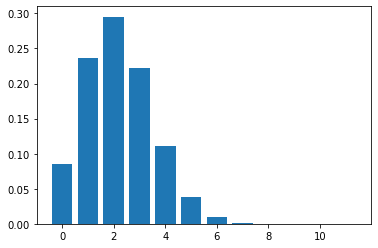

In [151]:
from scipy.stats import binom 
import matplotlib.pyplot as plt 
# setting the values 
# of n and p 
n = 11
p = 0.2
# defining list of r values 
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.bar(r_values, dist) 
plt.show()

In [149]:
r = binom.rvs(n, p, size=1000)


When success and failure are equally likely, the binomial distribution is a normal distribution. Hence, changing the value of p to 0.5, we obtain this graph, which is identical to a normal distribution plot :

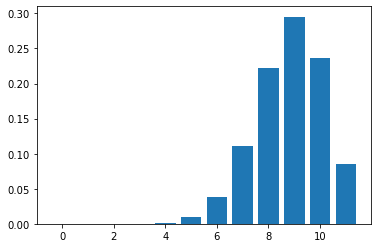

In [112]:
n = 11
p = 0.8
# defining list of r values 
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.bar(r_values, dist) 
plt.show()

In [11]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

0.23.2


In [12]:
models = [('lr',LogisticRegression()),('svm',SVC())]
ensemble = VotingClassifier(estimators=models)

In [13]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Next, we will demonstrate hard voting and soft voting for this dataset.

## Hard Voting Ensemble for Classification
We can demonstrate hard voting with a k-nearest neighbor algorithm.

We can fit five different versions of the KNN algorithm, each with a different number of neighbors used when making predictions. We will use 1, 3, 5, 7, and 9 neighbors (odd numbers in an attempt to avoid ties).

Our expectation is that by combining the predicted class labels predicted by each different KNN model that the hard voting ensemble will achieve a better predictive performance than any standalone model used in the ensemble, on average.

First, we can create a function named get_voting() that creates each KNN model and combines the models into a hard voting ensemble.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
	models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
	models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
	models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
	models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

We can then create a list of models to evaluate, including each standalone version of the KNN model configurations and the hard voting ensemble.

This will help us directly compare each standalone configuration of the KNN model with the ensemble in terms of the distribution of classification accuracy scores. The get_models() function below creates the list of models for us to evaluate.

In [18]:
def get_models():
	models = dict()
	models['knn1'] = KNeighborsClassifier(n_neighbors=1)
	models['knn3'] = KNeighborsClassifier(n_neighbors=3)
	models['knn5'] = KNeighborsClassifier(n_neighbors=5)
	models['knn7'] = KNeighborsClassifier(n_neighbors=7)
	models['knn9'] = KNeighborsClassifier(n_neighbors=9)
	models['hard_voting'] = get_voting()
	return models

In [19]:
get_models()

{'knn1': KNeighborsClassifier(n_neighbors=1),
 'knn3': KNeighborsClassifier(n_neighbors=3),
 'knn5': KNeighborsClassifier(),
 'knn7': KNeighborsClassifier(n_neighbors=7),
 'knn9': KNeighborsClassifier(n_neighbors=9),
 'hard_voting': VotingClassifier(estimators=[('knn1', KNeighborsClassifier(n_neighbors=1)),
                              ('knn3', KNeighborsClassifier(n_neighbors=3)),
                              ('knn5', KNeighborsClassifier()),
                              ('knn7', KNeighborsClassifier(n_neighbors=7)),
                              ('knn9', KNeighborsClassifier(n_neighbors=9))])}

In [20]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)    
    return X, y

In [38]:
X,y = get_dataset()

print(X.shape,y.shape)

(1000, 20) (1000,)


In [69]:
from scipy.stats import binom 
def get_binomial_dataset():
   
    # setting the values 
    # of n and p 
    n = 2 # Number of trials
    p = 0.7 # Probability of success

    # defining the list of r values 
    r_values = list(range(n + 1)) 

    # list of pmf values 
    dist = [binom.pmf(r, n, p) for r in r_values ] 
    # plotting the graph  
    plt.bar(r_values, dist) 
    plt.show()
    return r_values,dist

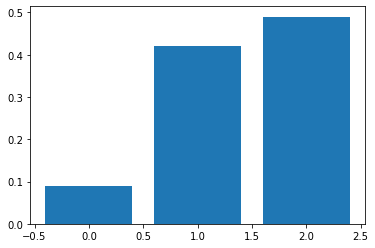

In [70]:
X,y = get_binomial_dataset()



In [64]:
print(y)

[0.0009765625, 0.00976562500000001, 0.04394531249999999, 0.11718750000000014, 0.20507812500000022, 0.24609375000000025, 0.20507812500000022, 0.11718750000000014, 0.04394531249999999, 0.00976562500000001, 0.0009765625]


Each model will be evaluated using repeated k-fold cross-validation.

The evaluate_model() function below takes a model instance and returns as a list of scores from three repeats of stratified 10-fold cross-validation.

In [22]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

We can then report the mean performance of each algorithm, and also create a box and whisker plot to compare the distribution of accuracy scores for each algorithm.

Tying this together, the complete example is listed below.

Model:knn1 Score: 0.880 Mean:0.873 Std:0.030
Model:knn3 Score: 0.870 Mean:0.889 Std:0.038
Model:knn5 Score: 0.840 Mean:0.895 Std:0.031
Model:knn7 Score: 0.880 Mean:0.899 Std:0.035
Model:knn9 Score: 0.860 Mean:0.900 Std:0.033
Model:hard_voting Score: 0.880 Mean:0.902 Std:0.034


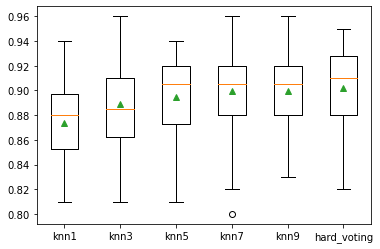

In [72]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

 
# define dataset
X, y = get_dataset()
#X,y = get_binomial_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('Model:%s Score: %.3f Mean:%.3f Std:%.3f' % (name, scores[1], mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

(array([2., 1., 2., 7., 4., 0., 2., 0., 1., 1.]),
 array([-5.52022952, -4.21792091, -2.9156123 , -1.61330369, -0.31099508,
         0.99131354,  2.29362215,  3.59593076,  4.89823937,  6.20054798,
         7.50285659]),
 <BarContainer object of 10 artists>)

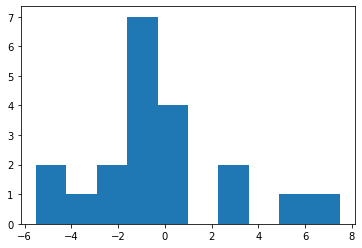

In [73]:
#pyplot.hist(results)
#pyplot.show()
import numpy as np
counts, bins = np.histogram(data)
pyplot.hist(bins[:-1], bins, weights=counts)

Running the example first reports the mean and standard deviation accuracy for each model.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

We can see the hard voting ensemble achieves a better classification accuracy of about 90.2% compared to all standalone versions of the model.

A box-and-whisker plot is then created comparing the distribution accuracy scores for each model, allowing us to clearly see that hard voting ensemble performing better than all standalone models on average.


If we choose a hard voting ensemble as our final model, we can fit and use it to make predictions on new data just like any other model.

First, the hard voting ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

The example below demonstrates this on our binary classification dataset.


In [77]:
# make a prediction with a hard voting ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
print(X,y)
#X,y = get_binomial_dataset()
# define the base models
models = list()
models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
# define the hard voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')
# fit the model on all available data
ensemble.fit(X, y)
# make a prediction for one example
data = [[5.88891819,2.64867662,-0.42728226,-1.24988856,-0.00822,-3.57895574,2.87938412,-1.55614691,-0.38168784,7.50285659,-1.16710354,-5.02492712,-0.46196105,-0.64539455,-1.71297469,0.25987852,-0.193401,-5.52022952,0.0364453,-1.960039]]
yhat = ensemble.predict(data)
print('Predicted Class: %d' % (yhat))

[[ 5.88891819  2.64867662 -0.42728226 ... -5.52022952  0.0364453
  -1.960039  ]
 [ 6.97517717  3.01467478  2.00089741 ... -0.83596798  4.47708461
  -1.93954487]
 [ 4.75991699 -0.55221295  2.85151795 ...  5.51656237  1.01637356
   1.99141629]
 ...
 [-3.40090052 -1.07897489  6.81679768 ... -2.32336045 -5.11813849
  -0.37726175]
 [-0.71293638 -1.67674502  0.15460334 ...  1.90768572 -0.91455953
  -3.1331576 ]
 [ 0.59748892  3.4254834   0.74847355 ...  0.73366379  0.92401359
   0.95631051]] [1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 

In [80]:
print(y,yhat)

[1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 0 0 1 0 

In [79]:
from sklearn.metrics import zero_one_loss


accuracy = zero_one_loss(y, yhat)
error_rate = 1 - accuracy
print(error_rate)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 1]

Running the example fits the hard voting ensemble model on the entire dataset and is then used to make a prediction on a new row of data, as we might when using the model in an application.

In [28]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [57]:
'''
The following code is for Gradient Boosting
Created by - ANALYTICS VIDHYA
'''

# importing required libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# read the train and test dataset
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)
print(train_data.head())
print(test_data.head())
# Now, we need to predict the missing target variable in the test data
# target variable - Survived



Shape of training data : (891, 12)
Shape of testing data : (418, 11)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C1

In [56]:
# seperate the independent and target variable on training data
train_x = train_data.drop(['Survived'],axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(['Survived'],axis=1)
test_y = test_data['Survived']



KeyError: "['Survived'] not found in axis"

In [152]:
# example of simulating a binomial process and counting success
from numpy.random import binomial
# define the parameters of the distribution
p = 0.3
k = 100
# run a single simulation
success = binomial(k, p)
print('Total Success: %d' % success)

Total Success: 34


In [153]:
# example of simulating a binomial process and counting success
from numpy.random import binomial
# define the parameters of the distribution
p = 0.8
k = 11
# run a single simulation
success = binomial(k, p)
print('Total Success: %d' % success)

Total Success: 10


In [95]:
# calculate moments of a binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.3
k = 100
# calculate moments
mean, var, _, _ = binom.stats(k, p, moments='mvsk')
print('Mean=%.3f, Variance=%.3f' % (mean, var))

Mean=30.000, Variance=21.000


In [109]:
# calculate moments of a binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.8
k = 11
# calculate moments
mean, var, _, _ = binom.stats(k, p, moments='mvsk')
print('Mean=%.3f, Variance=%.3f' % (mean, var))

Mean=8.800, Variance=1.760


In [114]:

# example of using the pmf for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.8
k = 11
# define the distribution
dist = binom(k, p)
# calculate the probability of n successes
for n in range(6, 12, 1):
    print('P of %d success: %.3f%%' % (n, dist.pmf(n)*100))


P of 6 success: 3.876%
P of 7 success: 11.073%
P of 8 success: 22.146%
P of 9 success: 29.528%
P of 10 success: 23.622%
P of 11 success: 8.590%


In [98]:
# example of using the cdf for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.3
k = 100
# define the distribution
dist = binom(k, p)
# calculate the probability of <=n successes
for n in range(10, 110, 10):
    print('P of %d success: %.3f%%' % (n, dist.cdf(n)*100))


P of 10 success: 0.000%
P of 20 success: 1.646%
P of 30 success: 54.912%
P of 40 success: 98.750%
P of 50 success: 99.999%
P of 60 success: 100.000%
P of 70 success: 100.000%
P of 80 success: 100.000%
P of 90 success: 100.000%
P of 100 success: 100.000%
